In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.5 MB/s eta 0:00:00


**Machine Learning Models**

1.Logistic Regression

2.Decision Tree

3.RandomForest

4.Naive Bayes

5.Support Vector Machine


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img)
    return np.array(images)

normal_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Normal')
stroke_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Stroke')

normal_labels = np.zeros(len(normal_images))
stroke_labels = np.ones(len(stroke_images))

X = np.concatenate((normal_images, stroke_images), axis=0)
y = np.concatenate((normal_labels, stroke_labels), axis=0)

y = y.astype(int)

X = X / 255.0


X_flat = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3, random_state=42, stratify=y)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True)
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_flat, y, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}, Test Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression, Test Accuracy: 89.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       466
           1       0.88      0.84      0.86       285

    accuracy                           0.89       751
   macro avg       0.89      0.88      0.89       751
weighted avg       0.89      0.89      0.89       751

--------------------------------------------------
Model: Decision Tree, Test Accuracy: 87.75%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       466
           1       0.83      0.85      0.84       285

    accuracy                           0.88       751
   macro avg       0.87      0.87      0.87       751
weighted avg       0.88      0.88      0.88       751

--------------------------------------------------
Model: Random Forest, Test Accuracy: 95.87%
Classification Report:
              precision    recall  f1

**Testing the model which gave more accuracy[RandomForest Classifier]**

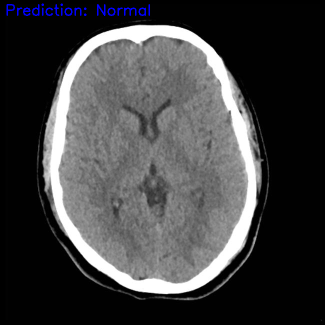

The image is classified as: Normal


In [ ]:
import numpy as np
import cv2
import os
from sklearn.ensemble import RandomForestClassifier
import joblib
from google.colab.patches import cv2_imshow

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img)
    return np.array(images)


normal_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Normal')
stroke_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Stroke')


normal_labels = np.zeros(len(normal_images))
stroke_labels = np.ones(len(stroke_images))


X = np.concatenate((normal_images, stroke_images), axis=0)
y = np.concatenate((normal_labels, stroke_labels), axis=0)

y = y.astype(int)
X = X / 255.0
X_flat = X.reshape(X.shape[0], -1)

rf_model = RandomForestClassifier()
rf_model.fit(X_flat, y)


joblib.dump(rf_model, 'random_forest_model.pkl')

def classify_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")

    img_resized = cv2.resize(img, (64, 64)) / 255.0
    img_flat = img_resized.flatten().reshape(1, -1)
    model = joblib.load('random_forest_model.pkl')
    prediction = model.predict(img_flat)
    label = "Normal" if prediction[0] == 0 else "Stroke"
    cv2.putText(img, f'Prediction: {label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    display_image = cv2.resize(img, (img.shape[1] // 2, img.shape[0] // 2))
    cv2_imshow(display_image)

    return label

image_path_to_classify = '/content/drive/MyDrive/Brain_Data_Organised/Normal/100 (17).jpg'  # Replace with your image path
classification_result = classify_image(image_path_to_classify)
print(f'The image is classified as: {classification_result}')






Deep Learning Models

1.ANN

2.RNN

3.CNN

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img)
    return np.array(images)

normal_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Normal')
stroke_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Stroke')

normal_labels = np.zeros(len(normal_images))
stroke_labels = np.ones(len(stroke_images))

X = np.concatenate((normal_images, stroke_images), axis=0)
y = np.concatenate((normal_labels, stroke_labels), axis=0)

X = X / 255.0
X_flat = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3, random_state=42)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

def build_ann():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)) )
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

ann_model = build_ann()
print("Training ANN model...")
ann_model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, verbose=1)

y_pred = ann_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("ANN Classification Report:")
print(classification_report(y_test, y_pred_classes))


Training ANN model...
Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5617 - loss: 1.6359
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5962 - loss: 0.6677
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6553 - loss: 0.6223
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6488 - loss: 0.5827
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6785 - loss: 0.5539
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6435 - loss: 0.5535
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6399 - loss: 0.5379
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6860 - loss: 0.5274
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6949 - loss: 0.5228
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7302 - loss: 0.4334
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7263 - loss: 0.4481
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize images to 64x64
            images.append(img)
    return np.array(images)

normal_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Normal')
stroke_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Stroke')

normal_labels = np.zeros(len(normal_images))
stroke_labels = np.ones(len(stroke_images))

X = np.concatenate((normal_images, stroke_images), axis=0)
y = np.concatenate((normal_labels, stroke_labels), axis=0)

X = X / 255.0
X_reshaped = X.reshape(X.shape[0], 64, 64 * 3)

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

def build_rnn():
    model = Sequential()
    model.add(Input(shape=(64, 192)))
    model.add(SimpleRNN(128, activation='relu', return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

rnn_model = build_rnn()
print("Training RNN model...")
rnn_model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, verbose=1)

y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("RNN Classification Report:")
print(classification_report(y_test, y_pred_classes))

Training RNN model...
Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6502 - loss: 0.6271
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8083 - loss: 0.4308
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8743 - loss: 0.3096
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8993 - loss: 0.2143
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9189 - loss: 0.1939
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9236 - loss: 0.1780
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9487 - loss: 0.1355
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9436 - loss: 0.1430
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9406 - loss: 0.1390
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9618 - loss: 0.1176
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9692 - loss: 0.0943
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img)
    return np.array(images)

normal_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Normal')
stroke_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Stroke')

normal_labels = np.zeros(len(normal_images))
stroke_labels = np.ones(len(stroke_images))

X = np.concatenate((normal_images, stroke_images), axis=0)
y = np.concatenate((normal_labels, stroke_labels), axis=0)

X = X / 255.0
X = X.reshape(X.shape[0], 64, 64, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

def build_cnn():
    model = Sequential()
    model.add(Input(shape=(64, 64, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn()
print("Training CNN model...")
cnn_model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, verbose=1)

y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("CNN Classification Report:")
print(classification_report(y_test, y_pred_classes))

Training CNN model...
Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.5749 - loss: 0.8528
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.6409 - loss: 0.6104
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.7220 - loss: 0.5427
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.7891 - loss: 0.4474
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.8503 - loss: 0.3340
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.8934 - loss: 0.2500
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.9282 - loss: 0.1789
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.9403 - loss: 0.1547
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.9610 - loss: 0.1103
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.9746 - loss: 0.0778
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.9684 - loss: 0.0758
Epoch 12/20
55/55 ━━━━

**Base paper methodolgy**

8/8 [==============================] - 1s 6ms/step
GA-BiLSTM Accuracy: 96.40%
Average BiLSTM AUC: 0.99
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1551
           1       0.97      0.93      0.95       950

    accuracy                           0.96      2501
   macro avg       0.97      0.96      0.96      2501
weighted avg       0.96      0.96      0.96      2501



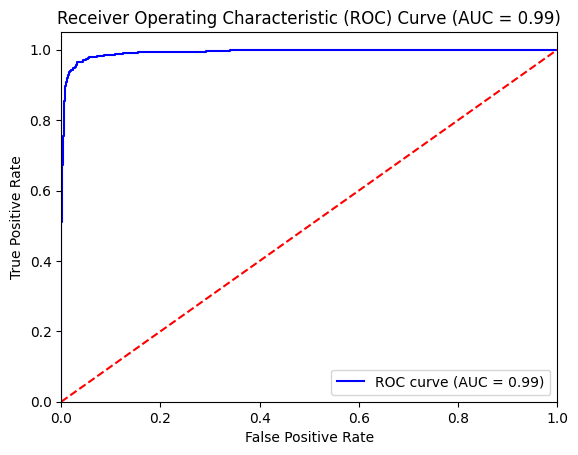

1/1 [==============================] - 0s 27ms/step
The image is classified as: Normal


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import tensorflow as tf

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))
            images.append(img)
    return np.array(images)

normal_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Normal')
stroke_images = load_images_from_folder('/content/drive/MyDrive/Brain_Data_Organised/Stroke')

normal_labels = np.zeros(len(normal_images))
stroke_labels = np.ones(len(stroke_images))

X = np.concatenate((normal_images, stroke_images), axis=0)
y = np.concatenate((normal_labels, stroke_labels), axis=0)
X = X / 255.0

lb = LabelBinarizer()
y = lb.fit_transform(y)

datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True)

def extract_features(model, X):
    features = model.predict(X, batch_size=32)
    return features

vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
X_cnn = extract_features(vgg_model, X)

X_cnn = X_cnn.reshape(X_cnn.shape[0], -1)

#SETTING UP THE GENETIC ALGORITHM !!
if "FitnessMax" not in creator.__dict__:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
if "Individual" not in creator.__dict__:
    creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_bool, n=X_cnn.shape[1])
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual)

def eval_individual(individual, y_train, X_train):
    selected_indices = [i for i in range(len(individual)) if individual[i] == 1]
    if len(selected_indices) == 0:
        return 0,

    X_train_selected = X_train[:, selected_indices]

    model = Sequential([Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],)),
                        Dense(1, activation='sigmoid')])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_selected, y_train, epochs=3, batch_size=32, verbose=0)

    accuracy = model.evaluate(X_train_selected, y_train, verbose=0)[1]
    return accuracy,

toolbox.register("evaluate", eval_individual, X_train=None)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def genetic_feature_selection(y_train, X_train, n_gen=10, pop_size=20):
    population = toolbox.population(n=pop_size)

    for gen in range(n_gen):
        fitnesses = list(map(lambda ind: eval_individual(ind, y_train, X_train), population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        population = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)

        population = toolbox.select(population, len(population))

    best_individual = tools.selBest(population, k=1)[0]
    selected_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]

    return selected_features

all_y_true = []
all_y_pred_proba = []

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []
roc_aucs = []

X_cnn = extract_features(vgg_model, X)
X_cnn = X_cnn.reshape(X_cnn.shape[0], -1)

for train_index, test_index in kf.split(X_cnn, y):
    X_train, X_test = X_cnn[train_index], X_cnn[test_index]
    y_train, y_test = y[train_index], y[test_index]

    selected_features = genetic_feature_selection(y_train, X_train)

    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    X_train_reshaped = X_train_selected.reshape(X_train_selected.shape[0], 1, X_train_selected.shape[1])
    X_test_reshaped = X_test_selected.reshape(X_test_selected.shape[0], 1, X_test_selected.shape[1])

    lstm_model = Sequential()
    lstm_model.add(Input(shape=(1, X_train_selected.shape[1])))
    lstm_model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Bidirectional(LSTM(64)))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Dense(1, activation='sigmoid'))

    lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    lstm_model.fit(X_train_reshaped, y_train, epochs=150, validation_data=(X_test_reshaped, y_test),
                    callbacks=[early_stopping], verbose=0)

    _, accuracy = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
    y_pred_proba = lstm_model.predict(X_test_reshaped).flatten()

    all_y_true.extend(y_test.flatten())
    all_y_pred_proba.extend(y_pred_proba)

    roc_auc = roc_auc_score(y_test.flatten(), y_pred_proba)
    roc_aucs.append(roc_auc)
    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies) * 100
average_auc = np.mean(roc_aucs)

print(f'GA-BiLSTM Accuracy: {average_accuracy:.2f}%')
print(f'Average BiLSTM AUC: {average_auc:.2f}')

print(classification_report(all_y_true, (np.array(all_y_pred_proba) > 0.5).astype(int)))

fpr, tpr, thresholds = roc_curve(all_y_true, all_y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % average_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve (AUC = {average_auc:.2f})')
plt.legend(loc='lower right')
plt.show()

lstm_model.save('stroke_classification_model.keras')

def classify_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")

    img_resized = cv2.resize(img, (224, 224)) / 255.0
    img_features = extract_features(vgg_model, np.array([img_resized]))

    img_features_reshaped = img_features.reshape(1, -1)[:, selected_features]
    img_features_reshaped_lstm_input = img_features_reshaped.reshape(1, 1, img_features_reshaped.shape[1])

    prediction = lstm_model.predict(img_features_reshaped_lstm_input)

    return "Stroke" if prediction > 0.5 else "Normal"

image_path_to_classify = '/content/drive/MyDrive/Brain_Data_Organised/Normal/100 (17).jpg'  # Replace with your image path
classification_result = classify_image(image_path_to_classify)
print(f'The image is classified as: {classification_result}')